# Compare classifier performance across cell representations

In [1]:
import polars as pl 
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison

preds = pl.read_parquet("./compiled_results/compiled_metrics.parquet")

### AUROC

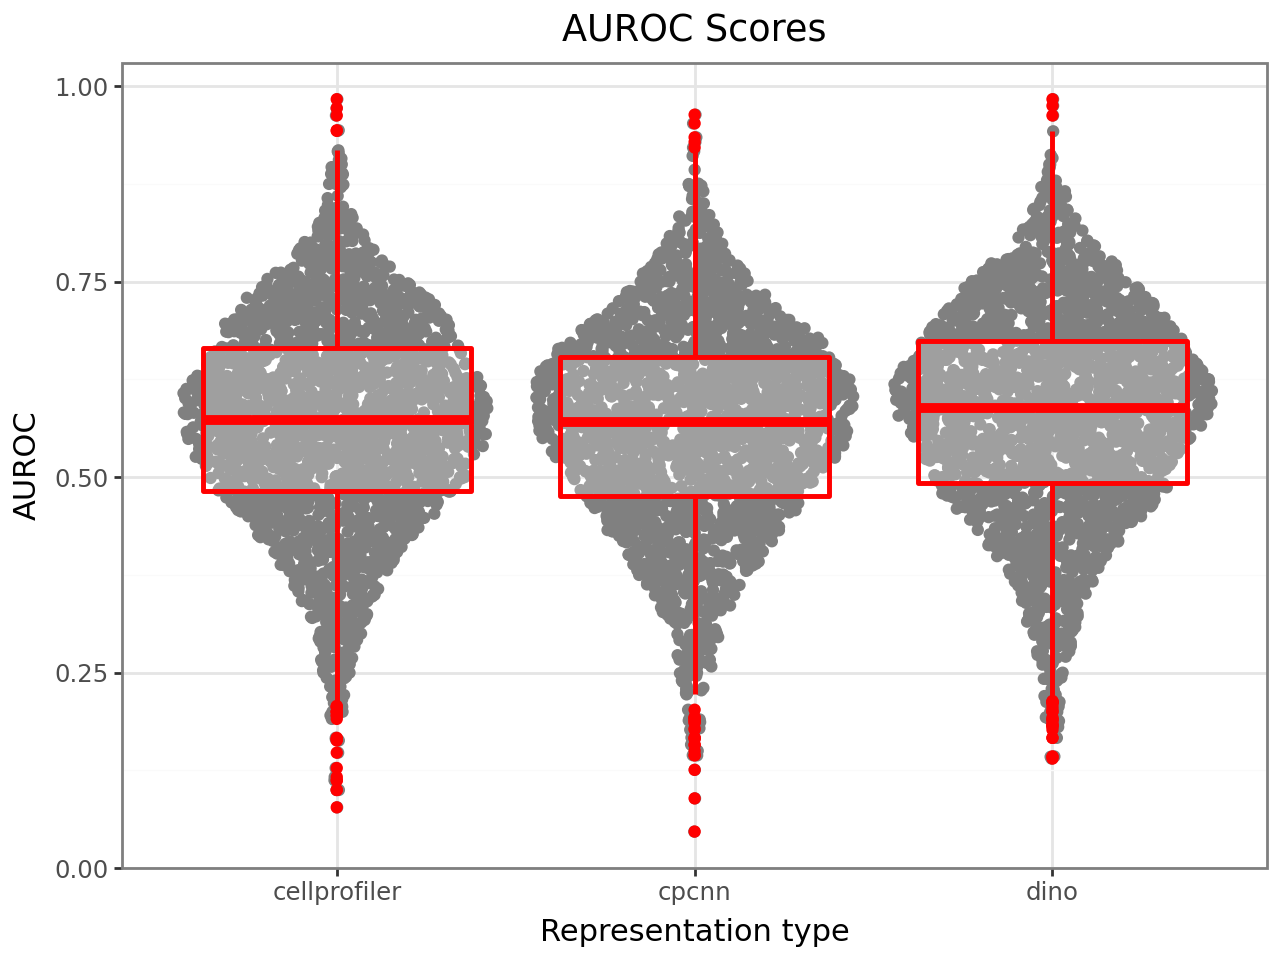

In [6]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(preds, aes(x='Feat_type', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores', x='Representation type', y='AUROC') 
    + theme_bw()
)
plot.show()

In [3]:
# AUROC
model = smf.mixedlm("AUROC ~ Feat_type", preds.to_pandas(), groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.0057 0.0332 -0.011 -0.0004   True
cellprofiler   dino   0.0116    0.0 0.0063  0.0168   True
       cpcnn   dino   0.0173    0.0  0.012  0.0225   True
---------------------------------------------------------
[3.32497516e-02 6.57422625e-07 7.79265541e-13]


### macro-averaged F1

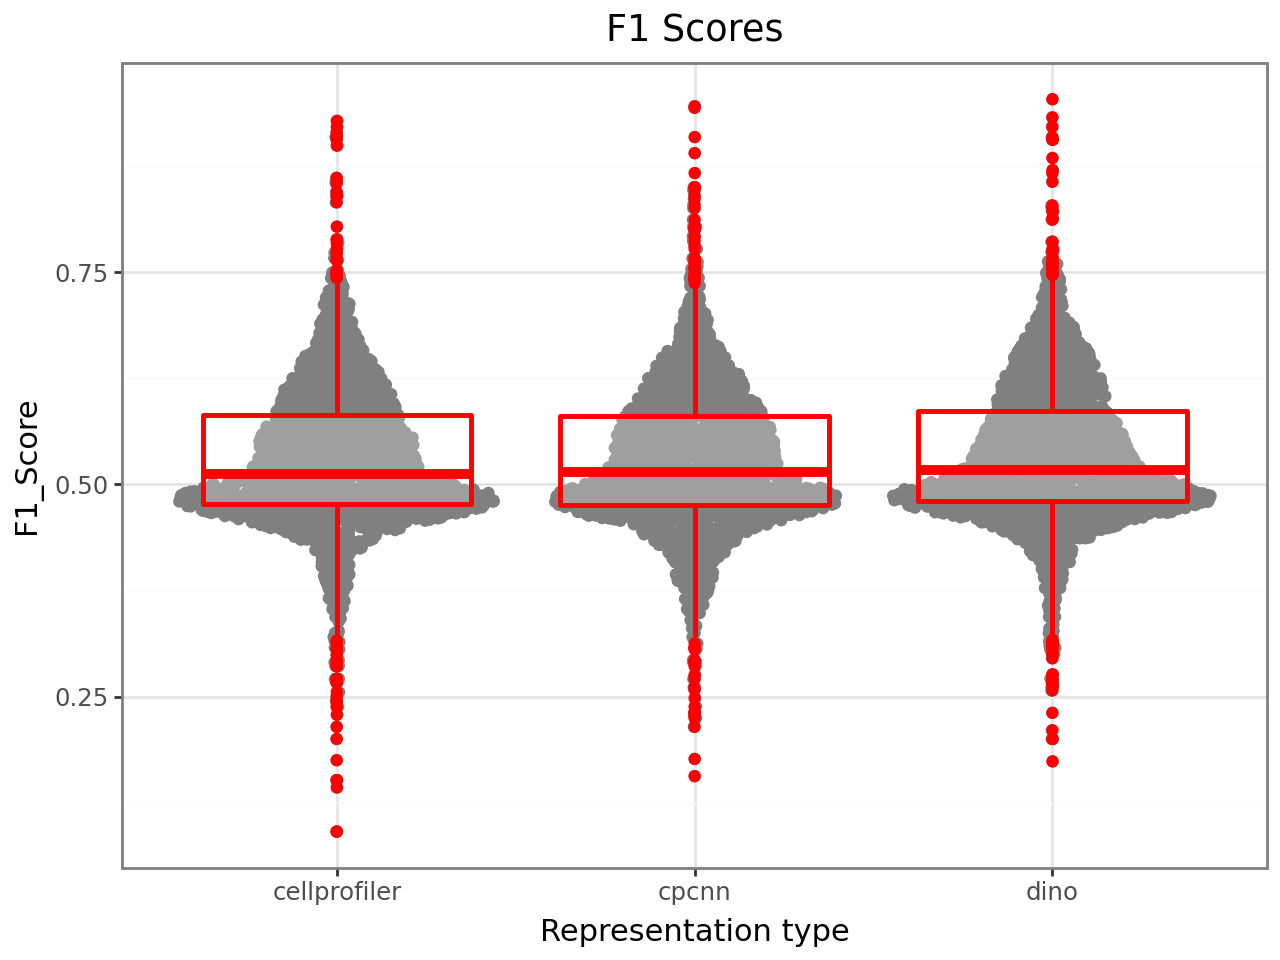

In [7]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(preds, aes(x='Feat_type', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='F1 Scores', x='Representation type', y='F1_Score') 
    + theme_bw()
)
plot.show()

In [4]:
# F1 (macro-averaged)
model = smf.mixedlm("F1_Score ~ Feat_type", preds.to_pandas(), groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.0012 0.6801 -0.0044 0.0021  False
cellprofiler   dino   0.0059    0.0  0.0028 0.0091   True
       cpcnn   dino   0.0071    0.0  0.0039 0.0103   True
---------------------------------------------------------
[6.80105946e-01 3.33852917e-05 6.10752517e-07]


### PRAUC

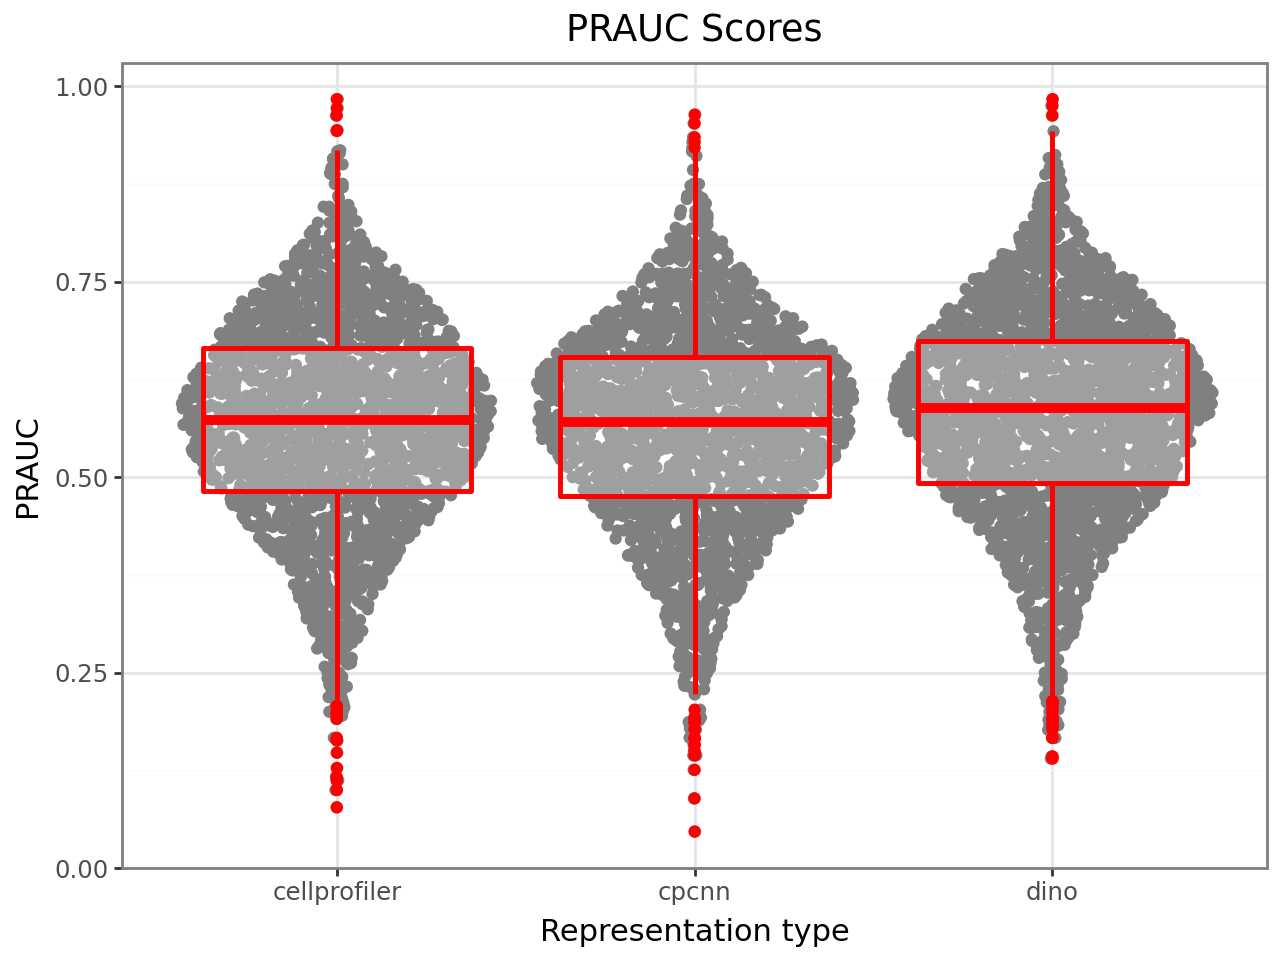

In [8]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(preds, aes(x='Feat_type', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC Scores', x='Representation type', y='PRAUC') 
    + theme_bw()
)
plot.show()

In [5]:
# PR-AUC
model = smf.mixedlm("PRAUC ~ Feat_type", preds.to_pandas(), groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.0057 0.0332 -0.011 -0.0004   True
cellprofiler   dino   0.0116    0.0 0.0063  0.0168   True
       cpcnn   dino   0.0173    0.0  0.012  0.0225   True
---------------------------------------------------------
[3.32497516e-02 6.57422625e-07 7.79265541e-13]
